In [1]:
from datasets import load_dataset

ds = load_dataset("ethz/food101")

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

C:\Users\Weiye\anaconda3\envs\dsa5204-project\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Weiye\.cache\huggingface\hub\datasets--ethz--food101. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


train-00000-of-00008.parquet:   0%|          | 0.00/490M [00:00<?, ?B/s]

train-00001-of-00008.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

train-00002-of-00008.parquet:   0%|          | 0.00/472M [00:00<?, ?B/s]

train-00003-of-00008.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

train-00004-of-00008.parquet:   0%|          | 0.00/475M [00:00<?, ?B/s]

train-00005-of-00008.parquet:   0%|          | 0.00/470M [00:00<?, ?B/s]

train-00006-of-00008.parquet:   0%|          | 0.00/478M [00:00<?, ?B/s]

train-00007-of-00008.parquet:   0%|          | 0.00/486M [00:00<?, ?B/s]

validation-00000-of-00003.parquet:   0%|          | 0.00/423M [00:00<?, ?B/s]

validation-00001-of-00003.parquet:   0%|          | 0.00/413M [00:00<?, ?B/s]

validation-00002-of-00003.parquet:   0%|          | 0.00/426M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/75750 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/25250 [00:00<?, ? examples/s]

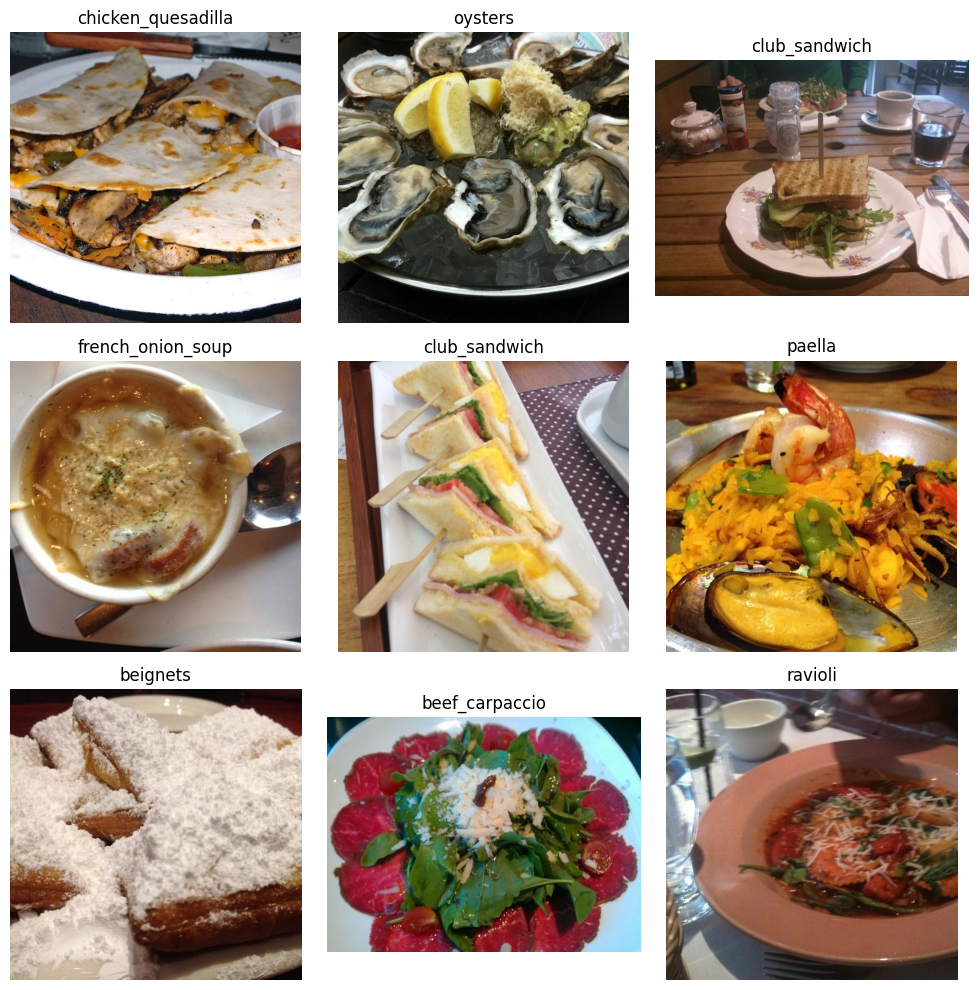

In [5]:
import random
import matplotlib.pyplot as plt

# Select 9 random samples
num_images = 9
samples = random.sample(range(len(ds["train"])), num_images)

# Create a figure for visualization
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, idx in enumerate(samples):
    # Load image and label
    image = ds["train"][idx]["image"]
    label = ds["train"][idx]["label"]

    # Convert label ID to class name
    class_name = ds["train"].features["label"].int2str(label)

    # Display image
    ax = axes[i // 3, i % 3]
    ax.imshow(image)
    ax.set_title(class_name)
    ax.axis("off")  # Hide axes

plt.tight_layout()
plt.show()

In [6]:
# Get all labels in Food-101 dataset
all_labels = ds["train"].features["label"].names

# Display all labels
print("Total Labels:", len(all_labels))
print(all_labels)  # List of 101 food classes

Total Labels: 101
['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'ma

Filter (num_proc=4):   0%|          | 0/75750 [00:00<?, ? examples/s]

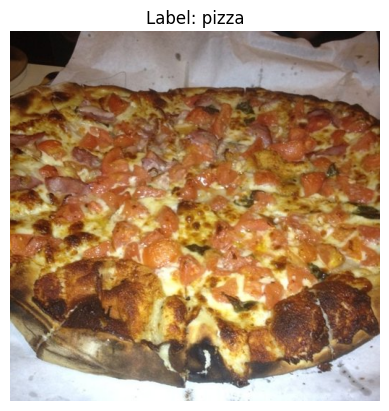

In [8]:
def get_image_by_label(dataset, label_name, split="train"):
    """
    Retrieve and display the first image of a given food label from the dataset.
    
    Args:
        dataset: Hugging Face dataset (Food-101).
        label_name (str): Name of the food category (e.g., "pizza").
        split (str): "train" or "test" dataset to search in.

    Returns:
        None (Displays the image)
    """
    # Convert label name to label ID
    label_id = dataset[split].features["label"].str2int(label_name)

    # Use .filter() to efficiently get an image
    filtered_dataset = dataset[split].filter(lambda x: x["label"] == label_id, num_proc=4)

    if len(filtered_dataset) > 0:
        image = filtered_dataset[0]["image"]

        # Display image
        plt.imshow(image)
        plt.title(f"Label: {label_name}")
        plt.axis("off")
        plt.show()
    else:
        print(f"No image found for label: {label_name}")

# Example Usage
get_image_by_label(ds, "pizza")  # 🍕
